<a href="https://colab.research.google.com/github/gulabpatel/Python_Tutorials/blob/master/Part_6_Scatter_pair_plot_PDF_CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Assignment

Describing the dataset




### <strong> Dataset </strong>
Haberman's Survival Data

### <strong> Description </strong>
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### <strong> Attribute Information </strong>
*Column 1*: Age of patient at the time of operation (numerical) <br>
*Column 2*: Patient's year of operation (year 1900 - numerical)<br>
*Column 3*: Number of positive axillary nodes detected (numerical)<br>
*Column 4*: Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 years

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

'''IMPORTANT'''
'''download haberman.csv from the classroom and upload the dataset in the content file in the left pane of the colab'''
#Load haberman.csv into a pandas dataFrame.
data = pd.read_csv("/content/drive/My Drive/haberman.csv")

## PART 1: Understanding the dataset

### Ques 1.1: Print the first 5 entries from the csv file
### Expected Output
<img src="https://drive.google.com/uc?id=1RykxjaDb8TZRM554d0D7fXQOeYAIfWMe">

In [4]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Ques 1.2: How many data-points and features does the dataset have?


In [5]:
# write your code here
data.shape ## From the below output it is clear that there are 306 data-points and 4 features

(306, 4)

### Ques 1.3: What are the column names in our dataset?


In [6]:
# write your code here
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Ques 1.4: How many data-points for each class of column 'status' are present?


In [7]:
# write your code here
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

## PART 2: Scatter Plot (2-D)

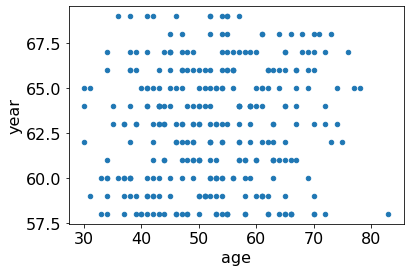

In [8]:
# Scatter Plot without color grading

data.plot(kind='scatter', x='age', y='year');
#plt.show()

# OBSERVATION: Both the classes are of same color (blue) and thus cannot make much sense.

### Ques 2.1: Color the points by their class-label/status-type


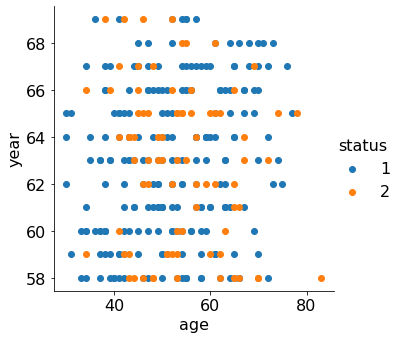

In [9]:
#sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", height=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
#plt.show()

### Ques 2.2: Make 2 separate plots each of only 1 status-type in column dimension of the grid


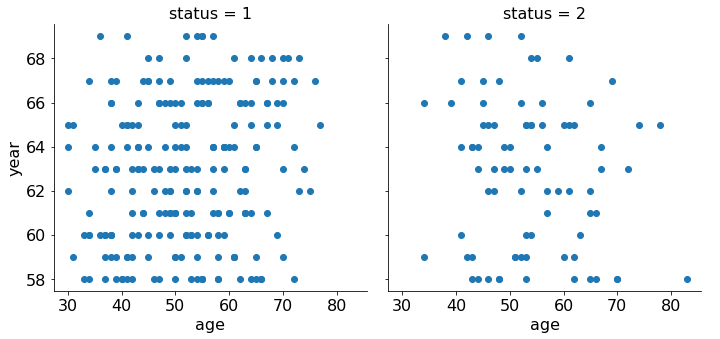

In [10]:
#sns.set_style("whitegrid")
sns.FacetGrid(data, col="status", height=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
#plt.show()

## PART 3: Pair Plots

### Ques 3.1: Plot the pairwise scatter plot with hue dimension of the grid


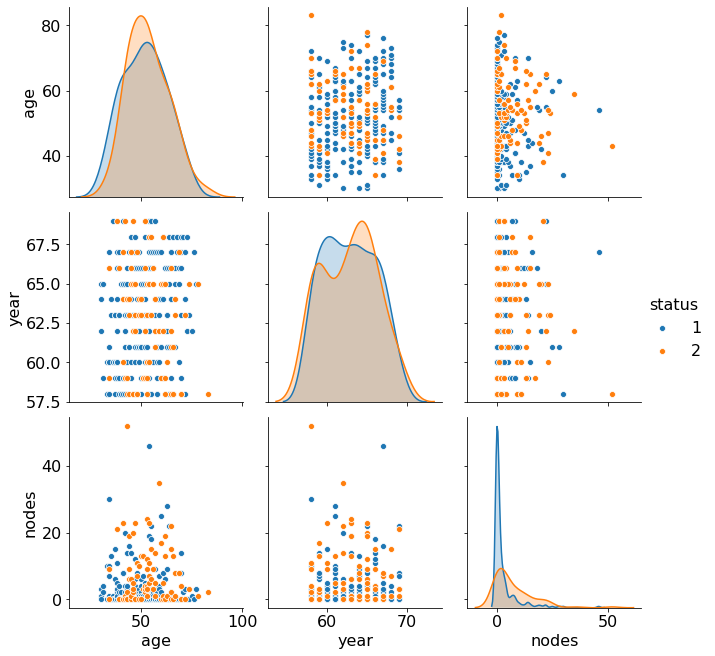

In [ ]:
# write your code here

sns.pairplot(data, hue="status", height = 3)

## PART 4: PDF and CDF

### Ques 4.1: Show the density plot with respect to the 'year' feature in 'row dimension' of the grid. 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


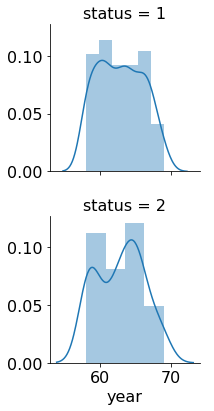

In [11]:
import numpy as np
import matplotlib.pyplot as plt
sns.FacetGrid(data, row="status",height=3)\
  .map(sns.distplot, "year").add_legend()

plt.show()

### Ques 4.2: Plot the CDF and PDF of 'age'.


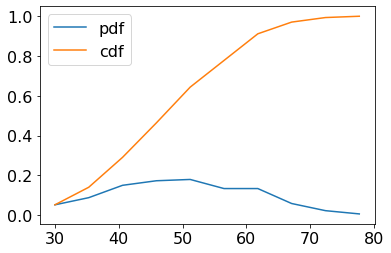

In [ ]:
# Write your code here
import numpy as np

counts, bin_edges = np.histogram(data["age"], bins=10, density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

pdfg = plt.plot(bin_edges[:-1], pdf, label="pdf" )
cdfg = plt.plot(bin_edges[:-1], cdf, label="cdf")

plt.legend()
plt.show()

### Ques 4.3: What percentage of people who died were less than 55 years old.


In [12]:
status_2 = data.loc[data["status"]==2]

In [13]:
# Write your code here
data_55 = status_2.loc[data['age']<55]
tc = status_2['status'].count()
x = data_55['status'].count()
dead_55 = int((x/tc)*100)
print(f"percentage_dead_under_50 = {dead_55}")

percentage_dead_under_50 = 60


For more details on sns.FacetGrid visit https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

https://seaborn.pydata.org/tutorial/axis_grids.html